In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [183]:
path = '/Users/alexandra/Desktop/ML research/'

y_48 = pd.read_excel(path + 'features.xlsx', usecols=['percent_gaze_duration_on_ai'])
x_48 = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                          'total_duration',
                          #'percent_duration_ai',
                          #'total_duration_on_ai',
                            
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           'total_duration_on_task',
                           'percent_duration_user', 
                           'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           'count_ai2task', 
                           'percent_shift_ai2task', 
                           'count_ai2user',
                           'percent_shift_ai2user',
                           'count_task2user', 
                           'percent_shift_task2user',
                           'count_task2ai', 
                           'percent_shift_task2ai',
                           'count_user2ai',
                           'percent_shift_user2ai',
                           'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

y_31 = pd.read_excel(path + 'Cross_validation_features.xlsx', usecols=['percent_gaze_duration_on_ai'])
x_31 = pd.read_excel(path + 'Cross_validation_features.xlsx', 
                  usecols=[
                           'total_duration',
                           #'percent_duration_ai',
                           #'total_duration_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           'total_duration_on_task',
                           'percent_duration_user', 
                           'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           'count_ai2task', 
                           'percent_shift_ai2task', 
                           'count_ai2user',
                           'percent_shift_ai2user',
                           'count_task2user', 
                           'percent_shift_task2user',
                           'count_task2ai', 
                           'percent_shift_task2ai',
                           'count_user2ai',
                           'percent_shift_user2ai',
                           'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])


In [184]:
#using 48 users and user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x_48, y_48, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)
y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"unshuffled mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"unshuffled coefficient of determination: {cod}")


#training error
y_hat = reg.predict(x_48)

r_square = mean_squared_error(y_48, y_hat)
print(f"training mean_squared_error: {r_square}")

cod = reg.score(x_48, y_48)
print(f"training coefficient of determination: {cod}")


unshuffled mean_squared_error: 0.0006065759050563836
unshuffled coefficient of determination: 0.8261014852809235
training mean_squared_error: 0.0007772092783444842
training coefficient of determination: 0.8244073098266638


In [185]:
#using 48 users and user 45, 46, 47, 48 for test, shuffled data 
x_train, x_test, y_train, y_test = train_test_split(x_48, y_48, test_size= 0.11)
reg = LinearRegression().fit(x_train, y_train)
y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"shuffled mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"shuffled coefficient of determination: {cod}")

#training error
y_hat = reg.predict(x_48)

r_square = mean_squared_error(y_48, y_hat)
print(f"training mean_squared_error: {r_square}")

cod = reg.score(x_48, y_48)
print(f"training coefficient of determination: {cod}")

shuffled mean_squared_error: 0.0010562732341919247
shuffled coefficient of determination: 0.8263486454586192
training mean_squared_error: 0.0007800021637974999
training coefficient of determination: 0.8237763211294038


In [186]:
#cross validation using 31 users
folds = KFold(n_splits = 31, shuffle = False)
scores = cross_val_score(reg, x_31, y_31, scoring='r2', cv=folds, )
avg_score = np.mean(scores)
print(f"average cofficient of determination: {avg_score}")

scores = cross_val_score(reg, x_31, y_31, scoring='neg_mean_squared_error', cv=folds, )
avg_score = np.mean(scores)
print(f"average negative mean squqred error: {avg_score}")

average cofficient of determination: 0.328800782096965
average negative mean squqred error: -0.001512032923530024


In [214]:
#use each user's 10th round for test (31 users)
y_train = pd.read_excel(path + 'Training data percent.xlsx', usecols=['percent_gaze_duration_on_ai'])
x_train = pd.read_excel(path + 'Training data percent.xlsx', 
                  usecols=[
                           'total_duration',
                           #'percent_duration_ai',
                           #'total_duration_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           'total_duration_on_task',
                           'percent_duration_user', 
                           'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           'count_ai2task', 
                           'percent_shift_ai2task', 
                           'count_ai2user',
                           'percent_shift_ai2user',
                           'count_task2user', 
                           'percent_shift_task2user',
                           'count_task2ai', 
                           'percent_shift_task2ai',
                           'count_user2ai',
                           'percent_shift_user2ai',
                           'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

y_test = pd.read_excel(path + 'Testing data percent.xlsx', usecols=['percent_gaze_duration_on_ai'])
x_test = pd.read_excel(path + 'Testing data percent.xlsx',         
                  
                  usecols=[
                           'total_duration',
                           #'percent_duration_ai',
                           #'total_duration_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           'total_duration_on_task',
                           'percent_duration_user', 
                           'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           'count_ai2task', 
                           'percent_shift_ai2task', 
                           'count_ai2user',
                           'percent_shift_ai2user',
                           'count_task2user', 
                           'percent_shift_task2user',
                           'count_task2ai', 
                           'percent_shift_task2ai',
                           'count_user2ai',
                           'percent_shift_user2ai',
                           'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])


reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"coefficient of determination: {cod}")

#training error
y_hat = reg.predict(x_48)

r_square = mean_squared_error(y_48, y_hat)
print(f"training mean_squared_error: {r_square}")

cod = reg.score(x_48, y_48)
print(f"training coefficient of determination: {cod}")


mean_squared_error: 0.0013465983960496016
coefficient of determination: 0.801694429980542
training mean_squared_error: 0.0010221963493321012
training coefficient of determination: 0.7690580750053384


In [188]:
#use total of 31 users and user 29, 30, 31 are for testing, shuffled
x_train, x_test, y_train, y_test = train_test_split(x_31, y_31, test_size= 0.09)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"shuffled mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"shuffled coefficient of determination: {cod}")

#training error
y_hat = reg.predict(x_31)

r_square = mean_squared_error(y_31, y_hat)
print(f"training mean_squared_error: {r_square}")

cod = reg.score(x_31, y_31)
print(f"training coefficient of determination: {cod}")

shuffled mean_squared_error: 0.0010007533873916054
shuffled coefficient of determination: 0.7894140590430482
training mean_squared_error: 0.0009695544438278353
training coefficient of determination: 0.7837472545676132


In [189]:
#use total of 31 users and user 29, 30, 31 are for testing, unshuffled
x_train, x_test, y_train, y_test = train_test_split(x_31, y_31, test_size= 0.094, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"unshuffled mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"unshuffled coefficient of determination: {cod}")

#training error
y_hat = reg.predict(x_31)

r_square = mean_squared_error(y_31, y_hat)
print(f"training mean_squared_error: {r_square}")

cod = reg.score(x_31, y_31)
print(f"training coefficient of determination: {cod}")

unshuffled mean_squared_error: 0.0009712403741237279
unshuffled coefficient of determination: 0.7918467762117896
training mean_squared_error: 0.0009814150988788157
training coefficient of determination: 0.7811018134232514


In [216]:
#using all inputs 
y = pd.read_excel(path + 'features.xlsx', usecols=['percent_gaze_duration_on_ai'])
x = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                          'total_duration',
                          #'percent_duration_ai',
                          #'total_duration_on_ai',
                            
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           'total_duration_on_task',
                           'percent_duration_user', 
                           'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           'count_ai2task', 
                           'percent_shift_ai2task', 
                           'count_ai2user',
                           'percent_shift_ai2user',
                           'count_task2user', 
                           'percent_shift_task2user',
                           'count_task2ai', 
                           'percent_shift_task2ai',
                           'count_user2ai',
                           'percent_shift_user2ai',
                           'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])


#user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"unshuffled mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"unshuffled coefficient of determination: {cod}")


unshuffled mean_squared_error: 0.0006065759050563836
unshuffled coefficient of determination: 0.8261014852809235


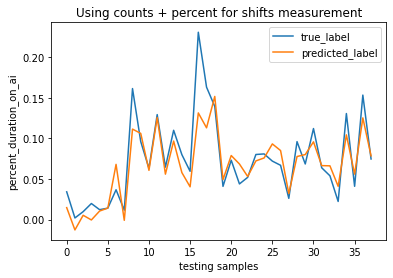

In [191]:
#prediction curve
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="true_label")
plt.plot(x_ax, y_hat, label="predicted_label")
plt.ylabel("percent_duration_on_ai")
plt.xlabel("testing samples")
plt.title("Using counts + percent for shifts measurement")
plt.legend()
plt.show()

coefficient of determination: 0.8025442314746825
mean_squared_error: 0.000504859746579642


Text(0, 0.5, 'square_loss')

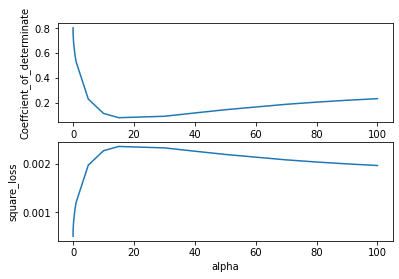

In [192]:
#regularization 
from sklearn.linear_model import Ridge

#best
reg = Ridge(alpha=0).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

#gidge research in Ridge regularization
a = [0,0.001, 0.1, 0.15, 0.2, 0.5, 0.7, 0.8, 1, 5, 10, 15, 30, 40, 50, 70, 80, 90, 100]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

coefficient of determination: 0.48599901476696716
mean_squared_error: 0.0013142103119320252


Text(0, 0.5, 'square_loss')

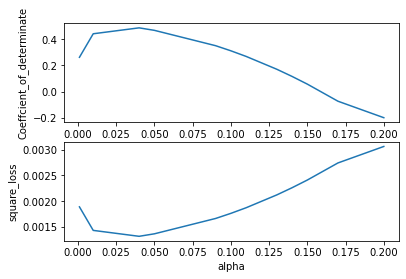

In [217]:
from sklearn.linear_model import Lasso

    
#best
reg = Lasso(alpha=0.04).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

a = [0.001,0.01, 0.04, 0.05, 0.09, 0.1, 0.11, 0.13, 0.14, 0.15, 0.17, 0.2]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Lasso(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
    
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

In [210]:
#using only precent
y = pd.read_excel(path + 'features.xlsx', usecols=['percent_gaze_duration_on_ai'])
x = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                           'total_duration',
                           #'percent_gaze_duration_on_ai',
                           #'total_gaze_duration_time_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           #'total_duration_on_task',
                           'percent_duration_user', 
                           #'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           #'count_ai2task', 
                           'percent_shift_ai2task', 
                           #'count_ai2user',
                           'percent_shift_ai2user',
                           #'count_task2user', 
                           'percent_shift_task2user',
                           #'count_task2ai', 
                           'percent_shift_task2ai',
                           #'count_user2ai',
                           'percent_shift_user2ai',
                           #'count_user2task', 
                           'percent_shift_user2task', 
                           'percent_shift_2ai', 
                           'percent_shift_2user', 
                           #'count_2task',
                           #'count_2ai', 
                           #'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

#user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"coefficient of determination: {cod}")

mean_squared_error: 0.0006298704756959438
coefficient of determination: 0.7906645992551445


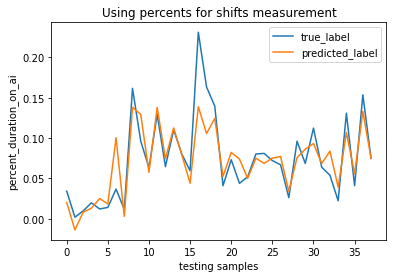

In [195]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="true_label")
plt.plot(x_ax, y_hat, label="predicted_label")
plt.ylabel("percent_duration_on_ai")
plt.xlabel("testing samples")
plt.title("Using percents for shifts measurement")
plt.legend()
plt.show()

coefficient of determination: 0.7668423335643735
mean_squared_error: 0.0005961432338437774


Text(0, 0.5, 'square_loss')

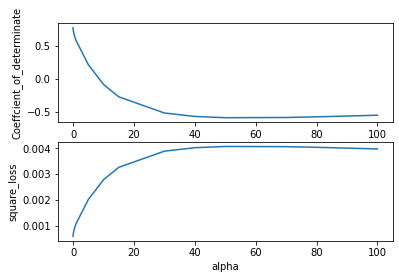

In [196]:
#regularization 
from sklearn.linear_model import Ridge

#best
reg = Ridge(alpha=0).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

#gidge research in Ridge regularization
a = [0,0.001, 0.1, 0.15, 0.2, 0.5, 0.7, 0.8, 1, 5, 10, 15, 30, 40, 50, 70, 80, 90, 100]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")


coefficient of determination: -0.1834372908704034
mean_squared_error: 0.0030258414591981054


Text(0, 0.5, 'square_loss')

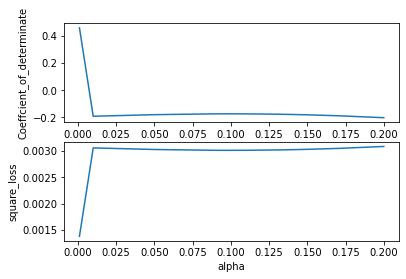

In [211]:
from sklearn.linear_model import Lasso

    
#best
reg = Lasso(alpha=0.15).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

a = [0.001,0.01, 0.04, 0.05, 0.09, 0.1, 0.11, 0.13, 0.14, 0.15, 0.17, 0.2]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Lasso(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
    
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

In [218]:
#using only counts
y = pd.read_excel(path + 'features.xlsx', usecols=['percent_gaze_duration_on_ai'])
x = pd.read_excel(path + 'features.xlsx', 
                  usecols=[
                            'total_duration',
                           #'percent_gaze_duration_on_ai',
                           #'total_gaze_duration_time_on_ai',
                            
                            #might be not needed 
                           'Trust',
                           'Familiarity',
                           'Age',
                           'Education',
                           'Gender',
                           
                           
                           'percent_duration_task',
                           #'total_duration_on_task',
                           'percent_duration_user', 
                           #'total_duration_on_user', 
                           'first_gaze_on_ai_start_time', 
                           'first_gaze_on_ai_duration',
                           'count_ai2task', 
                           #'percent_shift_ai2task', 
                           'count_ai2user',
                           #'percent_shift_ai2user',
                           'count_task2user', 
                           #'percent_shift_task2user',
                           'count_task2ai', 
                           #'percent_shift_task2ai',
                           'count_user2ai',
                           #'percent_shift_user2ai',
                           'count_user2task', 
                           #'percent_shift_user2task', 
                           #'percent_shift_2ai', 
                           #'percent_shift_2user', 
                           'count_2task',
                           'count_2ai', 
                           'count_2user',
                           'start_user_ai_acc',
                           'Orientation'])

#user 45, 46, 47, 48 for test, unshuffled data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.11, shuffle = False)
reg = LinearRegression().fit(x_train, y_train)

y_hat = reg.predict(x_test)

r_square = mean_squared_error(y_test, y_hat)
print(f"mean_squared_error: {r_square}")

cod = reg.score(x_train, y_train)
print(f"coefficient of determination: {cod}")

mean_squared_error: 0.0008185293322894663
coefficient of determination: 0.7529120175450392


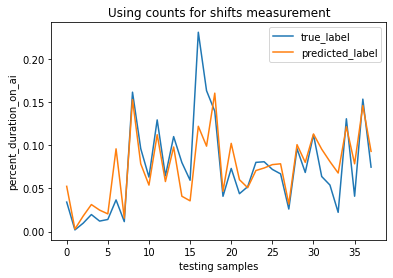

In [199]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="true_label")
plt.plot(x_ax, y_hat, label="predicted_label")
plt.ylabel("percent_duration_on_ai")
plt.xlabel("testing samples")
plt.title("Using counts for shifts measurement")
plt.legend()
plt.show()

coefficient of determination: 0.7222357415401994
mean_squared_error: 0.0007101944611808935


Text(0, 0.5, 'square_loss')

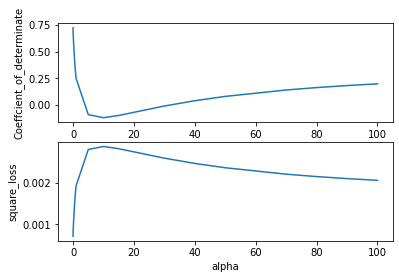

In [200]:
#regularization 
from sklearn.linear_model import Ridge

#best
reg = Ridge(alpha=0).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

#gidge research in Ridge regularization
a = [0,0.001, 0.1, 0.15, 0.2, 0.5, 0.7, 0.8, 1, 5, 10, 15, 30, 40, 50, 70, 80, 90, 100]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")


coefficient of determination: 0.41177454876385045
mean_squared_error: 0.001503989245088582


Text(0, 0.5, 'square_loss')

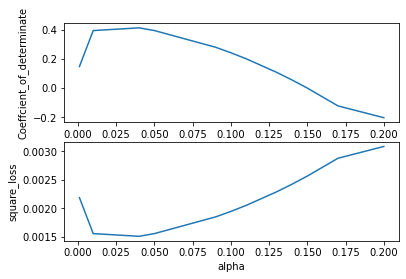

In [219]:
from sklearn.linear_model import Lasso

    
#best
reg = Lasso(alpha=0.04).fit(x_train,y_train)
y_hat = reg.predict(x_test)
r_square = mean_squared_error(y_test, y_hat)
cod = reg.score(x_test,y_test)
print(f"coefficient of determination: {cod}")
print(f"mean_squared_error: {r_square}")

a = [0.001,0.01, 0.04, 0.05, 0.09, 0.1, 0.11, 0.13, 0.14, 0.15, 0.17, 0.2]
R_2 = []
Y = []
sq_loss = []
for i in a:
    reg = Lasso(alpha=i).fit(x_train,y_train)
    y_hat = reg.predict(x_test)
    r_square = mean_squared_error(y_test, y_hat)
    cod = reg.score(x_test,y_test)
    R_2.append(cod)
    Y.append(i)
    sq_loss.append(r_square)
    
    
    
plt.subplot(2, 1, 1)
plt.plot(Y,R_2)
plt.xlabel("alpha")
plt.ylabel("Coeffcient_of_determinate")
plt.subplot(2, 1, 2)
plt.plot(Y,sq_loss)
plt.xlabel("alpha")
plt.ylabel("square_loss")

!!!best regularization results!!!

#all features, no regularziation
mean_squared_error: 1.7914600002476555
coefficient of determination: 0.3077191232312704

#all features, ridge
coefficient of determination: 0.2515105735820655
mean_squared_error: 1.7789582489379163

#all features, lasso
coefficient of determination: 0.24027562716948891
mean_squared_error: 1.805660697752295

#only presents with precent time
mean_squared_error: 1.7155543419408281
coefficient of determination: 0.24033927394215238

#only presents, ridge
coefficient of determination: 0.27387619907761507
mean_squared_error: 1.7258011667351973

#only presents, lasso
coefficient of determination: 0.15410245118576926
mean_squared_error: 2.0104711825003045

#only counts with total time
mean_squared_error: 1.6082633718893664
coefficient of determination: 0.26873265874852037

#only counts, ridge
coefficient of determination: 0.3212273817084039
mean_squared_error: 1.6132601287927684

#only counts, ridge
coefficient of determination: 0.31583452675252743
mean_squared_error: 1.6260774959732174